<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
 

<strong>Objectives:</strong>
+ Variables significativas para el clustering de productos
    
    
<strong>Conclusions:</strong>

   
</div>

In [1]:
import os, sys

def get_root_path(search_word):
    """ Búsqueda hacia atrás de un directorio con nombre search_word. """
    cwd = os.getcwd()
    while str(os.getcwd()).split('/')[-1] != search_word:
        os.chdir("..")
        cwd = os.getcwd()
    return cwd

ROOT_DIR = get_root_path('TFM_StockForecast')

sys.path.insert(0, ROOT_DIR) # Poner en el primer lugar del PATH (evitar paquetes con mismos nombres en otros directorios)

In [2]:
import pandas as pd
import numpy as np
from src.load_data import load_clustering_data, load_data
from src.trainer_clustering import get_pca_components, plot_cluster, train_DBSCAN, search_best
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def plot_series(time, series, format="-", start=0, end=None):
    
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Fecha")
    plt.ylabel("Unidades Venta")

def plot_series2(df):
    df['udsventa'].plot()
    plt.xlabel("Fecha")
    plt.ylabel("Unidades Venta")

In [4]:
main_df = load_data()

===================  LOAD DATASET stock ====================
Reading CSV in data/raw/03_TablaStock.csv...
=============  CLEAN CSV  ==============
Set columns to lowcase.
Sort values by date.
Dropped duplicates. Rows dropped: 628.
============  CLEAN STOCK  =============
Dropped rows with data from products with no stock data or out-of-date (descatalogados). Rows dropped: 1082
[WARNING] Number of dates missings:                                83
[WARNING] Number of dates missings (droping sundays and festivos): 63
[WARNING] Stock data with different units for same product & data. Rows: 13017
Dataset stock loaded. Shape: (26220, 3)

===================  LOAD DATASET ventas ===================
Reading CSV in data/raw/01_TablaVentas.csv...
=============  CLEAN CSV  ==============
Set columns to lowcase.
Sort values by date.
Dropped duplicates. Rows dropped: 0.
============  CLEAN VENTAS  ============
Dropped rows with data from products with no stock data or out-of-date (descatalogados). 

/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/create_variables.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['missing'] = (ts.udsstock.isna()) * 1
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/create_variables.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_data["roll4wd_" + col] = day_data.loc[(day_data.festivo == 0), col].rolling(4, win_type='triang', min_periods=1).mean()
/mnt/c/Users/Administrador/Documents/GitHub/TFM_StockForecast/src/create_va

Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for

Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and 

Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Get stock missing type
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by 

Get stock missing type
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by 

Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and 

Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Get stock missing type
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last

Get stock missing type
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by 

Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for

Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Get stock missing type
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last

Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for

Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Get stock missing type
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by 

Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Get stock missing type
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last

In [5]:
df = load_clustering_data()
df.head()

===================  LOAD DATASET stock ====================
Reading CSV in data/raw/03_TablaStock.csv...
=============  CLEAN CSV  ==============
Set columns to lowcase.
Sort values by date.
Dropped duplicates. Rows dropped: 628.
============  CLEAN STOCK  =============
Dropped rows with data from products with no stock data or out-of-date (descatalogados). Rows dropped: 1082
[WARNING] Number of dates missings:                                83
[WARNING] Number of dates missings (droping sundays and festivos): 63
[WARNING] Stock data with different units for same product & data. Rows: 13017
Dataset stock loaded. Shape: (26220, 3)

===================  LOAD DATASET ventas ===================
Reading CSV in data/raw/01_TablaVentas.csv...
=============  CLEAN CSV  ==============
Set columns to lowcase.
Sort values by date.
Dropped duplicates. Rows dropped: 0.
============  CLEAN VENTAS  ============
Dropped rows with data from products with no stock data or out-of-date (descatalogados). 

Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Get stock missing type
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by 

Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and 

Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Get stock missing type
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by 

Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for

Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Get stock missing type
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last

Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Get stock missing type
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by 

Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for

Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for

Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Get stock missing type
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by 

Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Get stock missing type
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by 

Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and weekday for column udsstock
Getting rolling windows of last 5 days by product and weekday for column udsprevisionempresa
Getting rolling windows of last 5 days by product and weekday for column udsventa
Getting rolling windows of last 5 days by product and 

Dataset ventas by product builded



,producto,fecha_min,fecha_max,frecuencia,intermitencia,venta_min,venta_q5,venta_q25,venta_median,venta_q75,...,venta_kurtosis,venta_mad,aug_ratio,wd_ratio_3,wd_ratio_4,wd_ratio_5,wd_ratio_6,wd_ratio_7,wd_ratio_1,wd_ratio_2
0,1,2019-06-05,2020-03-21,224,112358.744395,0.0,0.0,472.0,1889.0,6140.00,...,15.050234,3784.991603,0.963964,0.767457,2.232604,1.190459,0.153996,0.0,1.810698,0.860774
1,10,2019-06-05,2020-03-20,195,128709.278351,0.0,0.0,0.0,1792.5,3032.50,...,0.586530,1398.386400,0.701511,1.175611,2.090088,1.885536,0.000000,0.0,0.921395,0.923680
2,11,2019-06-05,2020-03-21,227,110867.256637,0.0,0.0,551.0,1653.0,2755.00,...,34.470112,1393.291518,0.578454,0.994103,1.363705,2.090199,0.560776,0.0,0.985710,1.005293
3,12,2019-06-05,2020-03-21,235,107076.923077,0.0,0.0,469.5,870.0,1283.75,...,6.426522,504.840683,0.689417,1.149821,1.506559,1.558032,0.887718,0.0,0.962776,0.932603
4,13,2019-06-05,2020-03-20,195,128709.278351,0.0,0.0,0.0,1549.0,2442.50,...,-0.589084,1091.281174,0.762283,1.125007,2.087554,1.850072,0.000000,0.0,0.973420,0.962418


In [6]:
df.describe()

,frecuencia,intermitencia,venta_min,venta_q5,venta_q25,venta_median,venta_q75,venta_q95,venta_max,venta_iqr,...,venta_kurtosis,venta_mad,aug_ratio,wd_ratio_3,wd_ratio_4,wd_ratio_5,wd_ratio_6,wd_ratio_7,wd_ratio_1,wd_ratio_2
count,72.000000,72.000000,72.0,72.0,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,...,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,221.347222,111511.695981,0.0,0.0,249.138889,809.444444,1258.690972,1978.272917,5436.236111,1009.552083,...,5.243009,576.911261,0.701977,1.187177,1.347131,1.694003,0.465598,0.007651,1.188545,1.117174
std,31.319867,8887.619186,0.0,0.0,405.502108,760.089939,1211.143391,2013.789905,8385.498578,1001.665064,...,11.944850,606.930006,0.222429,0.183523,0.255651,0.240250,0.371577,0.016304,0.378560,0.171599
min,14.000000,103966.804979,0.0,0.0,0.000000,0.000000,0.000000,0.000000,66.000000,0.000000,...,-1.314003,12.728162,0.000000,0.703444,0.775543,1.190459,0.000000,0.000000,0.459427,0.791527
25%,209.500000,106296.219035,0.0,0.0,0.000000,298.500000,432.250000,718.200000,1533.500000,367.937500,...,0.219355,208.046978,0.583862,1.096798,1.214751,1.553099,0.055423,0.000000,0.987462,1.003716
50%,234.500000,107076.923077,0.0,0.0,87.125000,553.000000,866.750000,1339.225000,2561.500000,702.375000,...,1.271559,379.032042,0.681501,1.172168,1.340576,1.678191,0.487120,0.000043,1.145110,1.066152
75%,236.250000,113375.565611,0.0,0.0,297.562500,1006.000000,1478.500000,2228.000000,5106.250000,1178.687500,...,3.888338,671.513763,0.765544,1.268570,1.425895,1.843972,0.819821,0.002788,1.504412,1.209828
max,242.000000,133276.595745,0.0,0.0,2067.750000,4132.000000,6140.000000,12232.800000,41564.000000,5668.000000,...,79.935774,3784.991603,2.038957,1.703964,2.232604,2.369764,1.164029,0.057507,1.930539,1.618719


In [7]:
df.head()

,producto,fecha_min,fecha_max,frecuencia,intermitencia,venta_min,venta_q5,venta_q25,venta_median,venta_q75,...,venta_kurtosis,venta_mad,aug_ratio,wd_ratio_3,wd_ratio_4,wd_ratio_5,wd_ratio_6,wd_ratio_7,wd_ratio_1,wd_ratio_2
0,1,2019-06-05,2020-03-21,224,112358.744395,0.0,0.0,472.0,1889.0,6140.00,...,15.050234,3784.991603,0.963964,0.767457,2.232604,1.190459,0.153996,0.0,1.810698,0.860774
1,10,2019-06-05,2020-03-20,195,128709.278351,0.0,0.0,0.0,1792.5,3032.50,...,0.586530,1398.386400,0.701511,1.175611,2.090088,1.885536,0.000000,0.0,0.921395,0.923680
2,11,2019-06-05,2020-03-21,227,110867.256637,0.0,0.0,551.0,1653.0,2755.00,...,34.470112,1393.291518,0.578454,0.994103,1.363705,2.090199,0.560776,0.0,0.985710,1.005293
3,12,2019-06-05,2020-03-21,235,107076.923077,0.0,0.0,469.5,870.0,1283.75,...,6.426522,504.840683,0.689417,1.149821,1.506559,1.558032,0.887718,0.0,0.962776,0.932603
4,13,2019-06-05,2020-03-20,195,128709.278351,0.0,0.0,0.0,1549.0,2442.50,...,-0.589084,1091.281174,0.762283,1.125007,2.087554,1.850072,0.000000,0.0,0.973420,0.962418


# PCA representation

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
data_pca = df.drop(["fecha_min","fecha_max"], axis=1)

columns = data_pca.columns
pca = PCA(2).fit(data_pca)
explained_variance = pca.explained_variance_ratio_
pca_data = pca.transform(data_pca)
# Normalizamos los datos
pca_data = StandardScaler().fit_transform(pca_data)

explained_variance.sum()

0.9871212625882034

In [20]:
pca_data = pd.DataFrame(data=pca_data, columns=["pca_1", "pca_2"], index = data_pca["producto"])
pca_data.head()

,pca_1,pca_2
producto,,
1,2.746308,3.521894
10,-0.981151,1.880031
11,1.289438,1.463302
12,0.321851,-0.401103
13,-1.300605,1.488115


# Dendograma

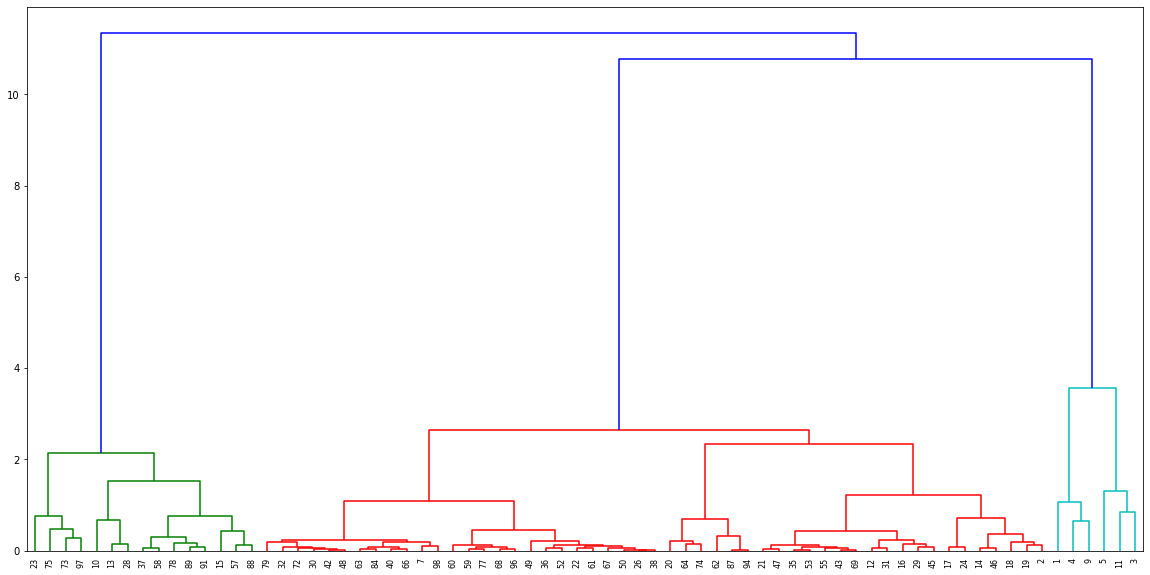

In [23]:

from scipy.cluster import hierarchy
def get_dendogram(df):
    # Calculate the distance between each sample
    Z = hierarchy.linkage(df, 'ward')
    
    plt.figure(figsize=(20,10))
    # Plot with Custom leaves
    hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=df.index, color_threshold=4)
    
    Z = pd.DataFrame(data=Z, columns = ['cl1','cl2','distance','num_lefs'])
    
    return Z

get_dendogram(pca_data)
plt.savefig("reports/clustering/dendograma.png")